<a href="https://colab.research.google.com/github/ISRAEL-MP/Practica0_Comentario_codigo_-limpio/blob/main/Analisis_Texual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de palabras frecuencia

In [153]:
pip install PyMuPDF gensim nltk PyPDF2 pdfplumber


In [155]:
pip install seaborn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('digital', 165), ('humano', 102), ('nuestra', 96), ('libertad', 92), ('técnica', 84), ('humana', 81), ('hombre', 72), ('cuerpo', 69), ('democracia', 67), ('capacidad', 65)]


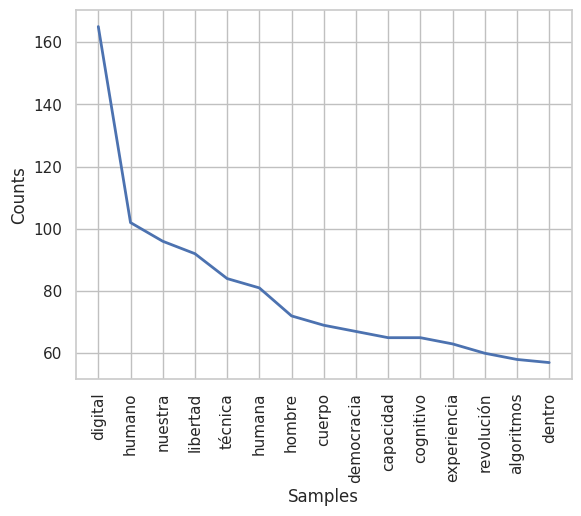

In [154]:
import fitz  # PyMuPDF
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Descarga de recursos necesarios (solo la primera vez)
nltk.download('punkt')

def extract_text_from_pdf(pdf_path):
    pdf_text = ""
    pdf_document = fitz.open(pdf_path)
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        pdf_text += page.get_text()
    pdf_document.close()
    return pdf_text

# Ruta del archivo PDF
pdf_path = '/content/Democracia-Liberal-Frente-a-la-Revolución-Digita.pdf'

# Extraer texto del archivo PDF
pdf_text = extract_text_from_pdf(pdf_path)

# Tokenización del texto en palabras
tokens = word_tokenize(pdf_text)

# Filtrar palabras por longitud mayor a 7 letras
longitud_especifica = 5
palabras_filtradas = [palabra for palabra in tokens if len(palabra) > longitud_especifica]

# Calcular la frecuencia de las palabras filtradas
frecuencia = FreqDist(palabras_filtradas)

# Mostrar las 10 palabras más frecuentes
print(frecuencia.most_common(10))

# Visualización de la frecuencia de las palabras filtradas
frecuencia.plot(15, cumulative=False)
plt.show()


# Redes con palabras frecuentes

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


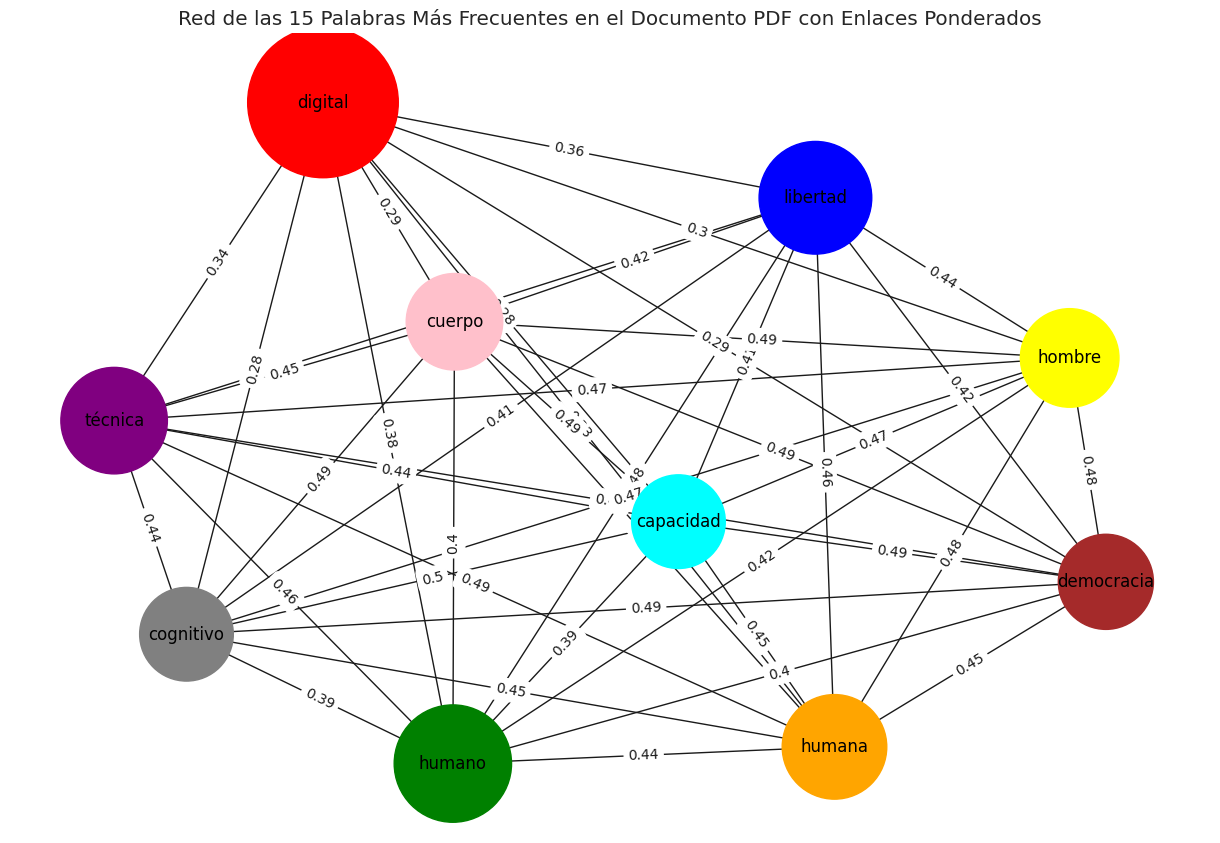

In [185]:
import fitz  # PyMuPDF
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import re

# Descargar recursos adicionales de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Ruta del archivo PDF
pdf_path = '/content/Democracia-Liberal-Frente-a-la-Revolución-Digita.pdf'

# Función para extraer texto de un archivo PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as pdf_document:
        num_pages = pdf_document.page_count
        for page_num in range(num_pages):
            page = pdf_document[page_num]
            text += page.get_text()
    return text

# Extraer texto del PDF
document_text = extract_text_from_pdf(pdf_path)

# Tokenizar palabras y filtrar stopwords
stop_words = set(stopwords.words('spanish'))  # Puedes ajustar el idioma según sea necesario
words = word_tokenize(document_text, language='spanish')  # Ajusta el idioma según sea necesario

# Filtrar palabras por longitud específica
longitud_especifica = 5
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and len(word) > longitud_especifica]

# Obtener las 15 palabras más frecuentes
word_frequencies = Counter(filtered_words)
most_common_words = word_frequencies.most_common(10)  # Ajusta el número según sea necesario

# Crear un gráfico de red con enlaces ponderados
G = nx.Graph()

for word, freq in most_common_words:
    G.add_node(word, frequency=freq)

# Agregar enlaces ponderados
for i in range(len(most_common_words)):
    for j in range(i + 1, len(most_common_words)):
        word1, freq1 = most_common_words[i]
        word2, freq2 = most_common_words[j]
        co_occurrences = sum(1 for _ in re.finditer(r'\b%s\b' % word2, document_text.lower()))
        weight = round(co_occurrences / (freq1 + freq2), 2)  # Reducir a 2 decimales
        G.add_edge(word1, word2, weight=weight)

# Colores personalizados para nodos
node_colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'pink', 'brown', 'cyan', 'gray']
node_color_map = {node: node_colors[i % len(node_colors)] for i, node in enumerate(G.nodes)}

# Tamaños personalizados para nodos (usando la frecuencia como ejemplo)
node_sizes = [G.nodes[node]['frequency'] * 70 for node in G.nodes]

# Tamaño personalizado de la figura
plt.figure(figsize=(12, 8))

# Visualizar la red con tamaños personalizados para nodos
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=12, font_color='black', node_size=node_sizes, node_color=list(node_color_map.values()), font_family='arial')

# Etiquetar enlaces con el peso
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Red de las 15 Palabras Más Frecuentes en el Documento PDF con Enlaces Ponderados')
plt.show()


In [ ]:
# Crear un archivo de texto para almacenar enlaces de coocurrencia
output_file_path = 'enlaces_coocurrencia.txt'

with open(output_file_path, 'w') as file:
    file.write('Palabra1\tPalabra2\tPeso\n')  # Escribir encabezados

    # Escribir enlaces de coocurrencia en el archivo
    for edge in G.edges(data=True):
        word1, word2, attributes = edge
        weight = attributes['weight']
        file.write(f'{word1}\t{word2}\t{weight}\n')

print(f'Enlaces de coocurrencia exportados a: {output_file_path}')


Enlaces de coocurrencia exportados a: enlaces_coocurrencia.txt


# Extraer texto

In [179]:
import fitz  # PyMuPDF

def convert_pdf_to_text(pdf_path, output_txt):
    pdf_document = fitz.open(pdf_path)
    texto = ""
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        texto += page.get_text()
    pdf_document.close()

    # Escribir el texto en un archivo de texto
    with open(output_txt, 'w', encoding='utf-8') as file:
        file.write(texto)

# Ruta del archivo PDF
pdf_path = '/content/Democracia-Liberal-Frente-a-la-Revolución-Digita.pdf'

# Nombre del archivo de texto de salida
output_txt = 'salida.txt'

# Convertir PDF a texto
convert_pdf_to_text(pdf_path, output_txt)


# Analisis Textual jerarquico y vectores

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import fitz  # PyMuPDF
import nltk

# Descarga de recursos necesarios (solo la primera vez)
nltk.download('punkt')

# Función para extraer texto de un archivo PDF
def extract_text_from_pdf(pdf_path):
    pdf_text = ""
    pdf_document = fitz.open(pdf_path)
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        pdf_text += page.get_text()
    pdf_document.close()
    return pdf_text

# Ruta del archivo PDF
pdf_path = '/content/Democracia-Liberal-Frente-a-la-Revolución-Digita.pdf'

# Extraer texto del archivo PDF
pdf_text = extract_text_from_pdf(pdf_path)

# Tokenización del texto en palabras
tokens = word_tokenize(pdf_text.lower())  # Convertimos a minúsculas para normalizar

# Filtrar palabras por longitud específica (por ejemplo, longitud mayor o igual a 6 letras)
longitud_minima = 5
tokens_filtrados = [palabra for palabra in tokens if len(palabra) >= longitud_minima]

# Entrenamiento del modelo Word2Vec con palabras filtradas por longitud
modelo_word2vec = Word2Vec([tokens_filtrados], vector_size=100, window=10, min_count=50, sg=0)

# Guardar el modelo entrenado (opcional)
ruta_modelo = "modelo_word2vec.bin"
modelo_word2vec.save(ruta_modelo)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


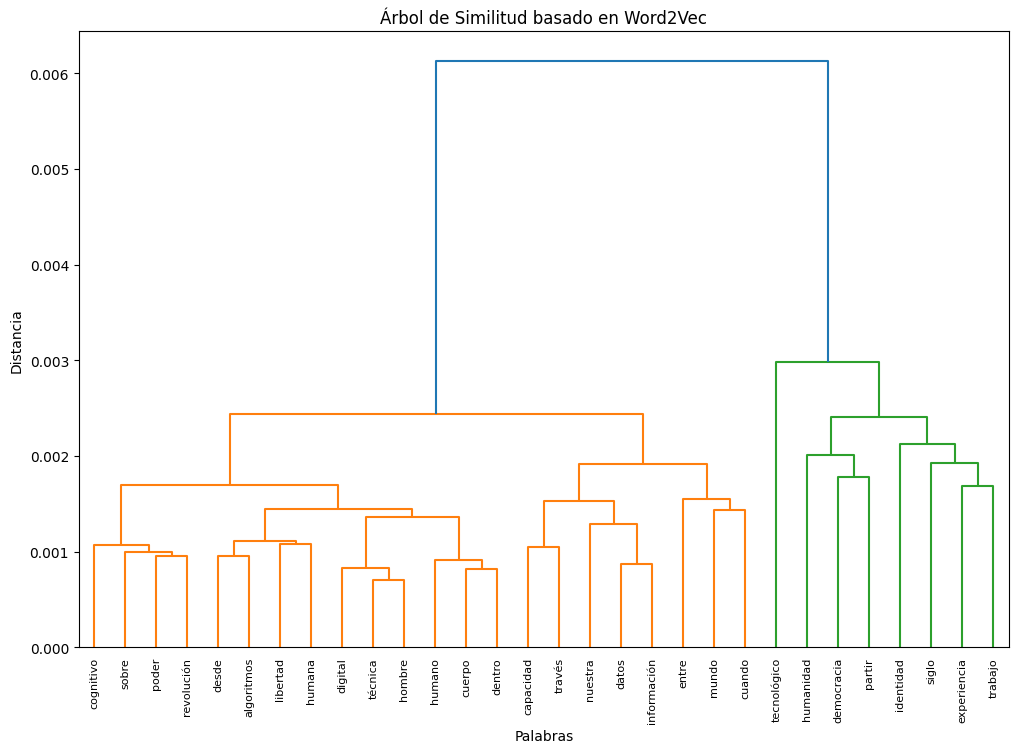

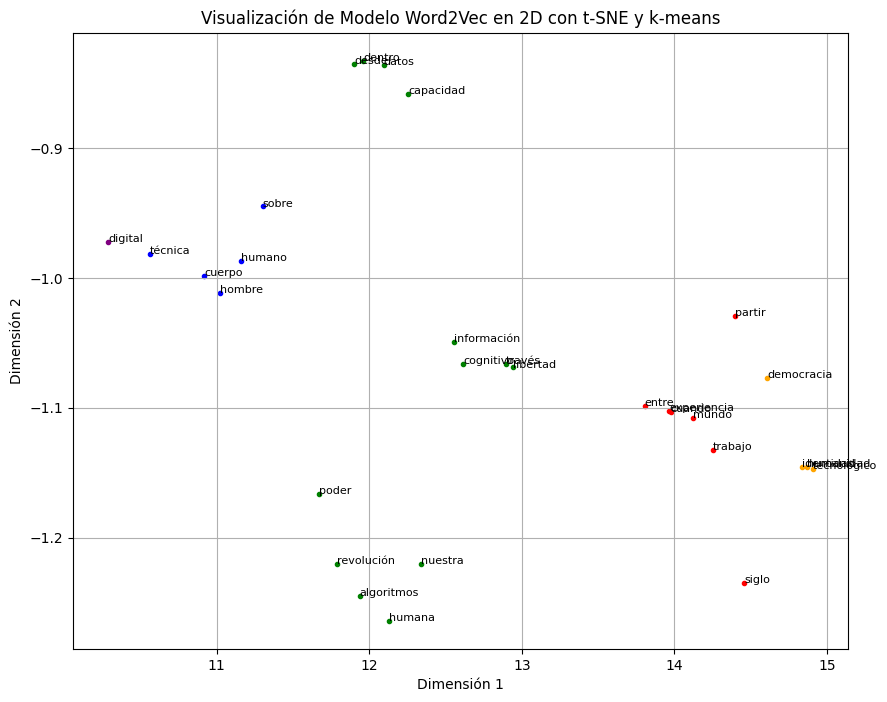

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

# Cargar el modelo Word2Vec preentrenado
ruta_modelo = "modelo_word2vec.bin"
modelo = Word2Vec.load(ruta_modelo)

# Obtener palabras y vectores
palabras = list(modelo.wv.index_to_key)
vectores = [modelo.wv[palabra] for palabra in palabras]

# Convertir la lista de vectores a un array numpy 2D
vectores = np.array(vectores)

# Reducción de dimensionalidad a 2D usando t-SNE
tsne = TSNE(n_components=2, perplexity=20)
vectores_2D = tsne.fit_transform(vectores)

# Agrupar palabras en 5 categorías usando k-means
num_categorias = 5
kmeans = KMeans(n_clusters=num_categorias, random_state=42)
categorias = kmeans.fit_predict(vectores)

# Calcular la similitud del coseno entre vectores
similarity_matrix = cosine_similarity(vectores)

# Calcular distancias para el dendrograma
distances = 1 - similarity_matrix

# Calcular el enlace jerárquico
enlace = linkage(distances, method='ward')

# Crear un dendrograma
plt.figure(figsize=(12, 8))
dendrogram(enlace, labels=palabras, leaf_rotation=90, leaf_font_size=8)
plt.title('Árbol de Similitud basado en Word2Vec')
plt.xlabel('Palabras')
plt.ylabel('Distancia')
plt.show()

# Crear un gráfico 2D con colores por categoría
plt.figure(figsize=(10, 8))
for i in range(num_categorias):
    plt.scatter(vectores_2D[categorias == i, 0], vectores_2D[categorias == i, 1], marker='.', color=colores[i])

# Etiquetar algunas palabras para visualización (opcional)
num_palabras_mostrar = 50
for i, palabra in enumerate(palabras[:num_palabras_mostrar]):
    plt.annotate(palabra, xy=(vectores_2D[i, 0], vectores_2D[i, 1]), fontsize=8)

plt.title('Visualización de Modelo Word2Vec en 2D con t-SNE y k-means')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()


## Analisis de redes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


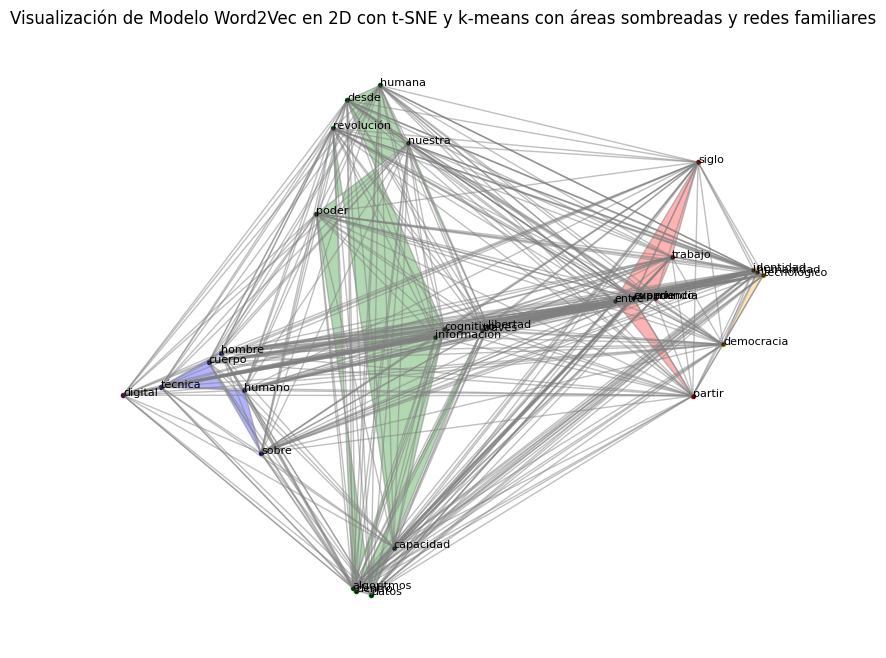

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import networkx as nx

# Cargar el modelo Word2Vec preentrenado
ruta_modelo = "modelo_word2vec.bin"
modelo = Word2Vec.load(ruta_modelo)

# Obtener palabras y vectores
palabras = list(modelo.wv.index_to_key)
vectores = [modelo.wv[palabra] for palabra in palabras]

# Convertir la lista de vectores a un array numpy 2D
vectores = np.array(vectores)

# Reducción de dimensionalidad a 2D usando t-SNE
tsne = TSNE(n_components=2, perplexity=20)
vectores_2D = tsne.fit_transform(vectores)

# Agrupar palabras en 5 categorías usando k-means
num_categorias = 5
kmeans = KMeans(n_clusters=num_categorias, random_state=42)
categorias = kmeans.fit_predict(vectores)

# Asignar colores a cada categoría
colores = ['red', 'blue', 'green', 'purple', 'orange']

# Crear un gráfico 2D con colores por categoría
plt.figure(figsize=(10, 8))

# Crear un polígono alrededor de cada categoría y rellenarlo con el color correspondiente
for i in range(num_categorias):
    plt.scatter(vectores_2D[categorias == i, 0], vectores_2D[categorias == i, 1], marker='.', color=colores[i])
    polygon = Polygon(vectores_2D[categorias == i], closed=True, facecolor=colores[i], edgecolor='none', alpha=0.3)
    plt.gca().add_patch(polygon)

# Crear un grafo de NetworkX
G = nx.Graph()

# Agregar nodos al grafo
for i in range(num_categorias):
    nodos_categoria = [palabras[j] for j in range(len(palabras)) if categorias[j] == i]
    G.add_nodes_from(nodos_categoria)

# Agregar enlaces entre nodos similares en el espacio vectorial con enlaces fuertes
umbral_similitud_fuerte = 0.8  # Puedes ajustar este umbral según tus necesidades
for i in range(len(palabras)):
    for j in range(i + 1, len(palabras)):
        similitud = modelo.wv.similarity(palabras[i], palabras[j])
        if similitud > umbral_similitud_fuerte:
            G.add_edge(palabras[i], palabras[j], weight=similitud)

# Establecer un umbral de peso para eliminar enlaces débiles
umbral_peso = 0.2  # Puedes ajustar este umbral según tus necesidades
edges_to_remove = [(u, v) for u, v, w in G.edges(data='weight') if w < umbral_peso]
G.remove_edges_from(edges_to_remove)

# Dibujar el grafo
pos = {palabra: (vectores_2D[palabras.index(palabra), 0], vectores_2D[palabras.index(palabra), 1]) for palabra in palabras}
nx.draw(G, pos, with_labels=False, node_size=5, node_color='black', edge_color='gray', alpha=0.5)

# Etiquetar algunas palabras para visualización (opcional)
num_palabras_mostrar = 30
for i, palabra in enumerate(palabras[:num_palabras_mostrar]):
    plt.annotate(palabra, xy=(vectores_2D[i, 0], vectores_2D[i, 1]), fontsize=8)

plt.title('Visualización de Modelo Word2Vec en 2D con t-SNE y k-means con áreas sombreadas y redes familiares')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()


## Mapa de clasificacion

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


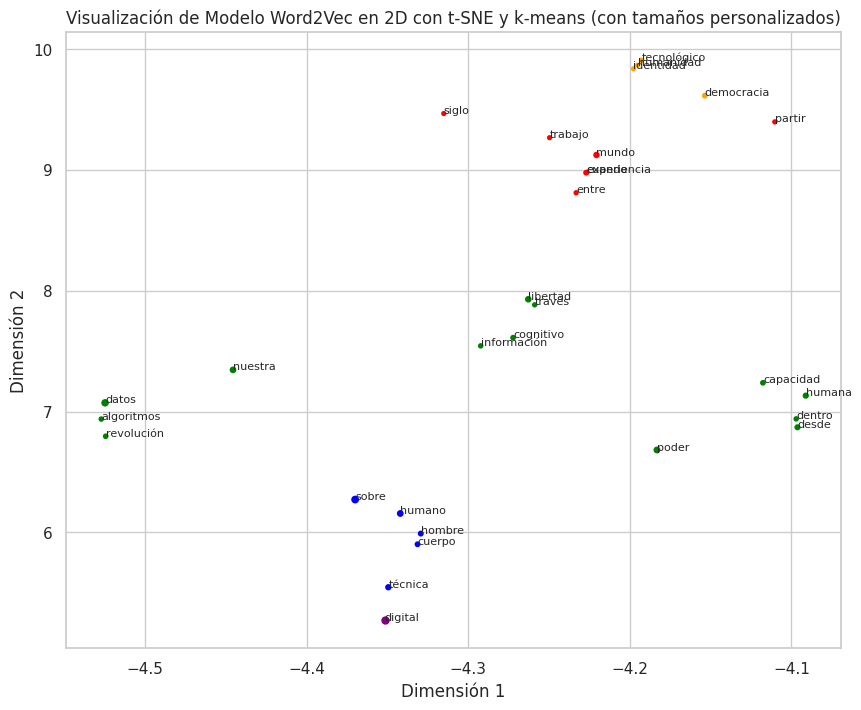

In [158]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Cargar el modelo Word2Vec preentrenado
ruta_modelo = "modelo_word2vec.bin"
modelo = Word2Vec.load(ruta_modelo)

# Obtener palabras, vectores y frecuencias
palabras = list(modelo.wv.index_to_key)
vectores = [modelo.wv[palabra] for palabra in palabras]
frecuencias = [modelo.wv.get_vecattr(palabra, 'count') for palabra in palabras]

# Convertir la lista de vectores y frecuencias a arrays numpy 2D
vectores = np.array(vectores)
frecuencias = np.array(frecuencias)

# Reducción de dimensionalidad a 2D usando t-SNE
tsne = TSNE(n_components=2, perplexity=20)
vectores_2D = tsne.fit_transform(vectores)

# Agrupar palabras en 5 categorías usando k-means
num_categorias = 5
kmeans = KMeans(n_clusters=num_categorias, random_state=42)
categorias = kmeans.fit_predict(vectores)

# Asignar colores y tamaños a cada categoría
colores = ['red', 'blue', 'green', 'purple', 'orange']
tamaños = 100* (frecuencias / max(frecuencias))  # Normalizar tamaños

# Crear un gráfico 2D con colores y tamaños por categoría
plt.figure(figsize=(10, 8))
for i in range(num_categorias):
    plt.scatter(
        vectores_2D[categorias == i, 0],
        vectores_2D[categorias == i, 1],
        marker='.',
        color=colores[i],
        s=tamaños[categorias == i]
    )

# Etiquetar algunas palabras para visualización (opcional)
num_palabras_mostrar = 50
for i, palabra in enumerate(palabras[:num_palabras_mostrar]):
    plt.annotate(palabra, xy=(vectores_2D[i, 0], vectores_2D[i, 1]), fontsize=8)

plt.title('Visualización de Modelo Word2Vec en 2D con t-SNE y k-means (con tamaños personalizados)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()


## Mapa de calor

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-171-5c5e5b40629c>:41: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


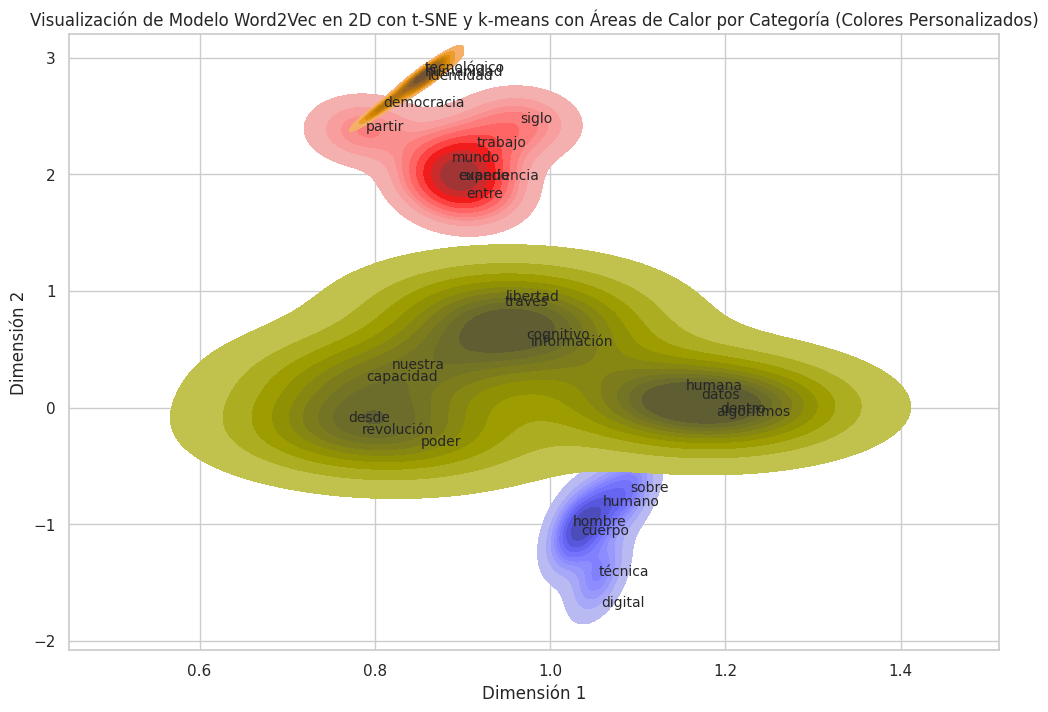

In [171]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el modelo Word2Vec preentrenado
ruta_modelo = "modelo_word2vec.bin"
modelo = Word2Vec.load(ruta_modelo)

# Obtener palabras y vectores
palabras = list(modelo.wv.index_to_key)
vectores = [modelo.wv[palabra] for palabra in palabras]

# Convertir la lista de vectores a un array numpy 2D
vectores = np.array(vectores)

# Reducción de dimensionalidad a 2D usando t-SNE
tsne = TSNE(n_components=2, perplexity=20)
vectores_2D = tsne.fit_transform(vectores)

# Agrupar palabras en 5 categorías usando k-means
num_categorias = 5
kmeans = KMeans(n_clusters=num_categorias, random_state=42)
categorias = kmeans.fit_predict(vectores)

# Crear un DataFrame con las categorías y las palabras
import pandas as pd
df = pd.DataFrame({'Palabra': palabras, 'Categoría': categorias})

# Definir una paleta de colores personalizada
colores_personalizados = ['red', 'blue', 'YELLOW', 'purple', 'orange']

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico 2D con colores por categoría y áreas de calor
plt.figure(figsize=(12, 8))
for i in range(num_categorias):
    sns.kdeplot(
        data=df[df['Categoría'] == i],
        x=vectores_2D[categorias == i, 0],
        y=vectores_2D[categorias == i, 1],
        fill=True,
        color=colores_personalizados[i],
        thresh=0.05,  # Ajusta el umbral según sea necesario
    )

# Etiquetar algunas palabras para visualización (opcional)
num_palabras_mostrar = 100
for i, palabra in enumerate(palabras[:num_palabras_mostrar]):
    plt.annotate(palabra, xy=(vectores_2D[i, 0], vectores_2D[i, 1]), fontsize=10)

plt.title('Visualización de Modelo Word2Vec en 2D con t-SNE y k-means con Áreas de Calor por Categoría (Colores Personalizados)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()


## mapa de burbujas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


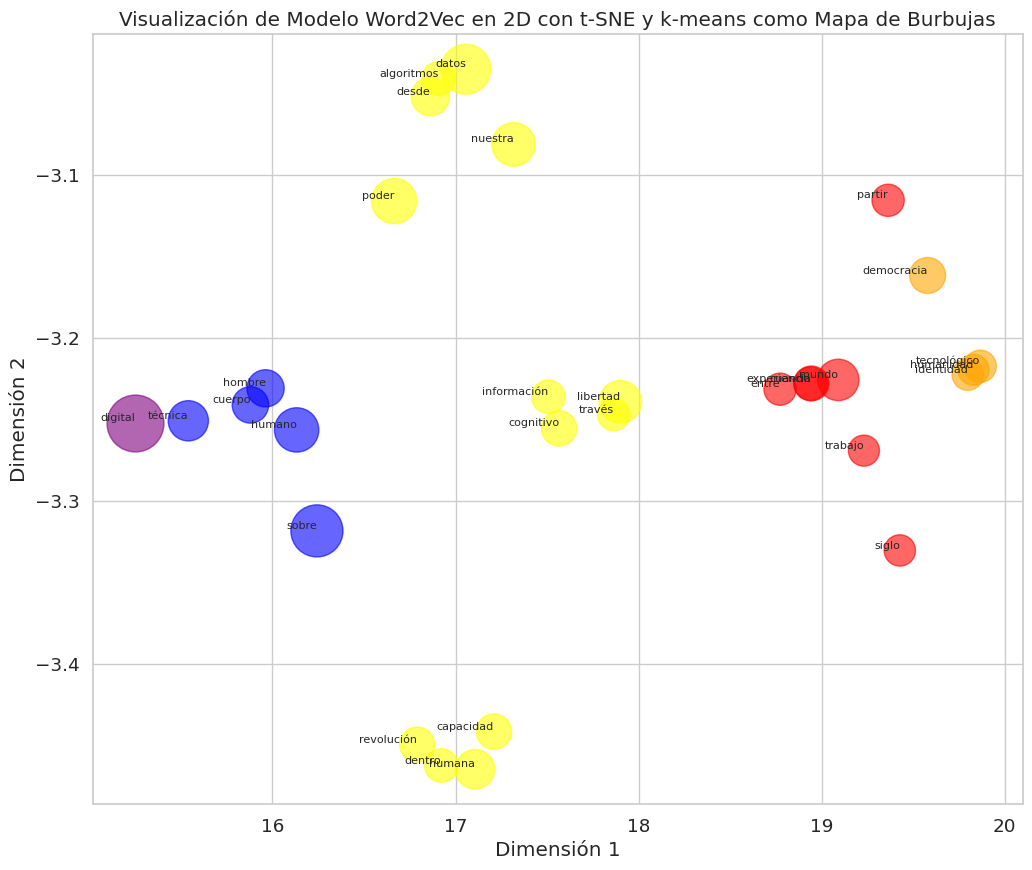

In [176]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el modelo Word2Vec preentrenado
ruta_modelo = "modelo_word2vec.bin"
modelo = Word2Vec.load(ruta_modelo)

# Obtener palabras, vectores y frecuencias
palabras = list(modelo.wv.index_to_key)
vectores = [modelo.wv[palabra] for palabra in palabras]
frecuencias = [modelo.wv.get_vecattr(palabra, 'count') for palabra in palabras]

# Convertir la lista de vectores y frecuencias a arrays numpy 2D
vectores = np.array(vectores)
frecuencias = np.array(frecuencias)

# Reducción de dimensionalidad a 2D usando t-SNE
tsne = TSNE(n_components=2, perplexity=20)
vectores_2D = tsne.fit_transform(vectores)

# Agrupar palabras en 5 categorías usando k-means
num_categorias = 5
kmeans = KMeans(n_clusters=num_categorias, random_state=42)
categorias = kmeans.fit_predict(vectores)

# Crear un DataFrame con las categorías y las palabras
import pandas as pd
df = pd.DataFrame({'Palabra': palabras, 'Categoría': categorias, 'Frecuencia': frecuencias})

# Definir una paleta de colores personalizada
colores_personalizados = ['red', 'blue', 'yellow', 'purple', 'orange']

# Configurar el estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Crear un gráfico de burbujas con colores por categoría y tamaños según frecuencia
plt.figure(figsize=(12, 10))
for i in range(num_categorias):
    plt.scatter(
        x=vectores_2D[categorias == i, 0],
        y=vectores_2D[categorias == i, 1],
        color=colores_personalizados[i],
        s=frecuencias[categorias == i] * 10,  # Multiplicar por 10 o ajusta según sea necesario
        alpha=0.6,  # Ajustar la transparencia de las burbujas
        label=f'Categoría {i}'
    )

# Etiquetar algunas palabras para visualización (opcional)
num_palabras_mostrar = 100
for i, palabra in enumerate(palabras[:num_palabras_mostrar]):
    plt.annotate(palabra, xy=(vectores_2D[i, 0], vectores_2D[i, 1]), fontsize=8, ha='right', va='bottom')

plt.title('Visualización de Modelo Word2Vec en 2D con t-SNE y k-means como Mapa de Burbujas')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()


# csv de modelo

In [ ]:
from gensim.models import Word2Vec
import pandas as pd

# Cargar el modelo Word2Vec pre-entrenado
ruta_modelo = "modelo_word2vec.bin"  # Ruta al modelo Word2Vec pre-entrenado
modelo = Word2Vec.load(ruta_modelo)

# Obtener las palabras y sus vectores
palabras = list(modelo.wv.index_to_key)
vectores = [modelo.wv[palabra] for palabra in palabras]

# Crear un DataFrame de pandas con palabras y vectores
df = pd.DataFrame({'Palabra': palabras, 'Vector': vectores})

# Exportar el DataFrame a un archivo CSV
ruta_csv = "vectores_word2vec.csv"  # Ruta para el archivo CSV de salida
df.to_csv(ruta_csv, index=False)


In [ ]:
import pandas as pd

# Ruta del archivo CSV con los vectores Word2Vec
ruta_csv = "vectores_word2vec.csv"

# Leer el archivo CSV usando pandas
df = pd.read_csv(ruta_csv)

# Visualizar los primeros registros del DataFrame (para comprobar la lectura)
print(df.head())


            Palabra                                             Vector
0         seguridad  [-0.00299871  0.02437046  0.03778199  0.041881...
1          factores  [-0.01005814  0.01504691  0.02109219  0.022169...
2            minera  [-0.00172481  0.01746722  0.01280143  0.018489...
3     investigación  [-0.00962186  0.02305299  0.01846693  0.016399...
4  organizacionales  [-0.00873444  0.01607821  0.01297409  0.018089...


# Traductor

In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=6527f57eefc8016f265b280f097312792ed2c4d79eb5159fced90cce088a7897
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
pip install PyMuPDF Pytesseract pip install reportlab


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Las 10 palabras más frecuentes (mayores a 5 letras):
[('medical', 237), ('patient', 210), ('healthcare', 166), ('patients', 126), ('health', 121), ('system', 106), ('doctor', 104), ('important', 103), ('should', 96), ('language', 94)]


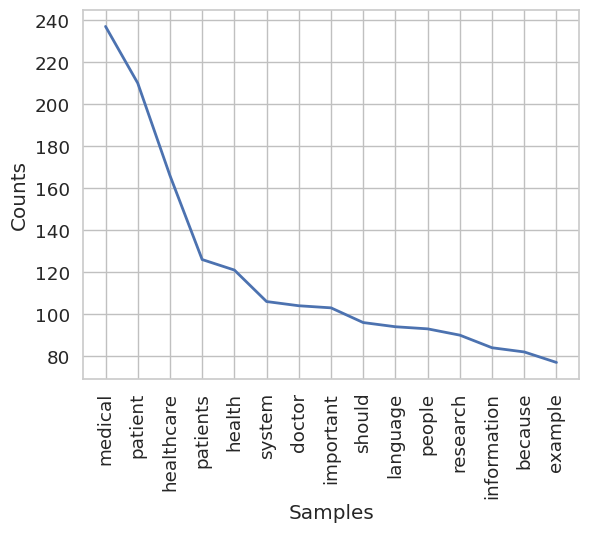

In [183]:
import fitz  # PyMuPDF
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from googletrans import Translator

# Descarga de recursos necesarios (solo la primera vez)
nltk.download('punkt')

def compositar_pdf(pdf_path, longitud_especifica=5, top_palabras=10, plot_palabras=15, output_txt='salida.txt'):
    # Extraer texto del archivo PDF
    def extract_text_from_pdf(pdf_path):
        pdf_text = ""
        pdf_document = fitz.open(pdf_path)
        for page_num in range(pdf_document.page_count):
            page = pdf_document.load_page(page_num)
            pdf_text += page.get_text()
        pdf_document.close()
        return pdf_text

    # Tokenización del texto en palabras
    pdf_text = extract_text_from_pdf(pdf_path)
    tokens = word_tokenize(pdf_text)

    # Filtrar palabras por longitud mayor a la especificada
    palabras_filtradas = [palabra for palabra in tokens if len(palabra) > longitud_especifica]

    # Calcular la frecuencia de las palabras filtradas
    frecuencia = FreqDist(palabras_filtradas)

    # Traducir el texto a español dividido en fragmentos
    translator = Translator()
    fragmentos = [pdf_text[i:i+5000] for i in range(0, len(pdf_text), 5000)]  # Divide en fragmentos de 5000 caracteres
    texto_traducido = [translator.translate(fragmento, dest='es').text for fragmento in fragmentos]

    # Unir los fragmentos traducidos
    texto_traducido = ' '.join(texto_traducido)

    # Guardar el texto traducido en un archivo
    with open(output_txt, 'w', encoding='utf-8') as archivo_salida:
        archivo_salida.write(texto_traducido)

    # Mostrar las palabras más frecuentes
    print(f"Las {top_palabras} palabras más frecuentes (mayores a {longitud_especifica} letras):")
    print(frecuencia.most_common(top_palabras))

    # Visualización de la frecuencia de las palabras filtradas
    frecuencia.plot(plot_palabras, cumulative=False)
    plt.show()

# Ruta del archivo PDF
pdf_path = '/content/dokumen.pdf'

# Llamar a la función compositar_pdf con salida a 'salida.txt'
compositar_pdf(pdf_path, output_txt='salida.txt')


# Resumidor

In [201]:
pip install gensim

In [200]:
pip install bert-extractive-summarizer

## resumidor pdf

In [203]:
import fitz  # PyMuPDF
from summarizer import Summarizer

def extract_text_from_pdf(pdf_path):
    pdf_text = ""
    pdf_document = fitz.open(pdf_path)
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        pdf_text += page.get_text()
    pdf_document.close()
    return pdf_text

def summarize_text(text, ratio=0.2):
    # Utilizar bert-extractive-summarizer para resumir el texto
    summarizer = Summarizer()
    summary = summarizer(text, ratio=ratio)
    return summary

def generate_chapter_summaries(pdf_path, output_txt='salida.txt', chapter_ratio=0.2):
    # Extraer el texto completo del PDF
    full_text = extract_text_from_pdf(pdf_path)

    # Dividir el texto en capítulos (puedes ajustar esto según la estructura de tu PDF)
    chapters = full_text.split("Chapter")

    # Resumir el texto general
    general_summary = summarize_text(full_text)

    # Resumir cada capítulo
    chapter_summaries = [summarize_text(chapter, ratio=chapter_ratio) for chapter in chapters[1:]]  # Ignorar el primer elemento ya que es el texto antes del primer "Chapter"

    # Guardar resumen general y por capítulos en un archivo de texto
    with open(output_txt, 'w', encoding='utf-8') as output_file:
        output_file.write("Resumen General:\n")
        output_file.write(general_summary)
        output_file.write("\n\nResumen por Capítulos:\n")
        for i, summary in enumerate(chapter_summaries, start=1):
            output_file.write(f"Capítulo {i}:\n")
            output_file.write(summary)
            output_file.write("\n\n")

    print("Resumen general y por capítulos guardado en", output_txt)

# Ruta del archivo PDF
pdf_path = '/content/B._Prosser-K._Wallace-The_practice_of_mine_ventilation_engineering-2015.pdf'

# Llamar a la función para generar resumen general y por capítulos
generate_chapter_summaries(pdf_path, output_txt='salida.txt', chapter_ratio=0.2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resumen general y por capítulos guardado en salida.txt


## resumidor text

In [205]:
import fitz  # PyMuPDF
from summarizer import Summarizer

def extract_text_from_pdf(pdf_path):
    pdf_text = ""
    pdf_document = fitz.open(pdf_path)
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        pdf_text += page.get_text()
    pdf_document.close()
    return pdf_text

def summarize_text(text, ratio=0.2):
    # Utilizar bert-extractive-summarizer para resumir el texto
    summarizer = Summarizer()
    summary = summarizer(text, ratio=ratio)
    return summary

def generate_chapter_summaries(pdf_path, output_txt='salida.txt', chapter_ratio=0.2):
    # Extraer el texto completo del PDF
    full_text = extract_text_from_pdf(pdf_path)

    # Dividir el texto en capítulos (puedes ajustar esto según la estructura de tu PDF)
    chapters = full_text.split("Chapter")

    # Resumir el texto general
    general_summary = summarize_text(full_text)

    # Resumir cada capítulo
    chapter_summaries = [summarize_text(chapter, ratio=chapter_ratio) for chapter in chapters[1:]]  # Ignorar el primer elemento ya que es el texto antes del primer "Chapter"

    # Guardar resumen general y por capítulos en un archivo de texto
    with open(output_txt, 'w', encoding='utf-8') as output_file:
        output_file.write("Resumen General:\n")
        output_file.write(general_summary)
        output_file.write("\n\nResumen por Capítulos:\n")
        for i, summary in enumerate(chapter_summaries, start=1):
            output_file.write(f"Capítulo {i}:\n")
            output_file.write(summary)
            output_file.write("\n\n")

    print("Resumen general y por capítulos guardado en", output_txt)

# Ruta del archivo PDF
pdf_path = '/content/salida (3).txt'

# Llamar a la función para generar resumen general y por capítulos
generate_chapter_summaries(pdf_path, output_txt='salida.txt', chapter_ratio=0.2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resumen general y por capítulos guardado en salida.txt
